## **Data Mining with Python**
### **Semana 2: Clustering ``KMeans()``**
**Andrés C. Medina Sanhueza**

PhD(c) Engineering Systems

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

<img src="https://files.realpython.com/media/K-Means-Clustering-in-Python_Watermarked.14dc56523461.jpg" width=700 height=400/>

## **1. Breve Intro a Python**

#### **1.1 Importar librerías Útiles**

In [1]:
import numpy as np
import pandas as pd
import plotnine as ptn
import warnings 
from plotnine import *
from matplotlib import pyplot as plt 

# Omite Warnings
warnings.simplefilter("ignore")

#### **1.2 Presenta versiones de las librerías**

In [2]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)
print("Pandas version:",pd.__version__)
print("Plotnine version:",ptn.__version__)

Python version: 3.8.8 (default, Apr 13 2021, 19:58:26) 
[GCC 7.3.0]
Numpy version: 1.23.2
Pandas version: 1.4.3
Plotnine version: 0.9.0


#### **1.3 Diagrama de Dispersión Iris Data**

Para mayor detalle de las características de este conjunto de datos, visite los datasets de juguete que tiene ``sklean`` en su sitio oficial https://scikit-learn.org/stable/datasets/toy_dataset.html

In [3]:
from sklearn import datasets

# Cargando el dataset de la flor de iris
iris = datasets.load_iris()

# Analizando las variables que tiene
print(iris.keys(),"\n") 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 



In [4]:
# Contiene los datos 
iris.data

# Contiene el target numérico
iris.target

# Contiene el target como una marca o flag
iris.target_names

# Contiene la descripción del conjunto de datos
iris.DESCR

# Contiene las características o variables
iris.feature_names

# Contiene el path de donde se almacena el conjunto de datos
iris.filename

'iris.csv'

In [5]:
# Convierto a DataFrame el archivo iris data
tempDF = pd.DataFrame(iris.data, columns = iris.feature_names)

# Muestro los cuatro primeros registros de iris data 
tempDF.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2


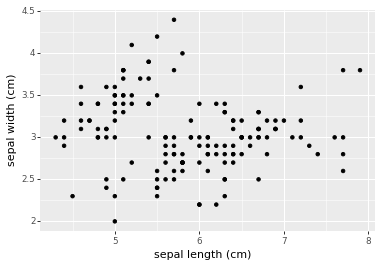

<ggplot: (8730897156602)>

In [6]:
# Diagrama de dispersión (Sepal length v/s Sepel width)
ggplot(tempDF) + aes(x="sepal length (cm)", y="sepal width (cm)") + geom_point()

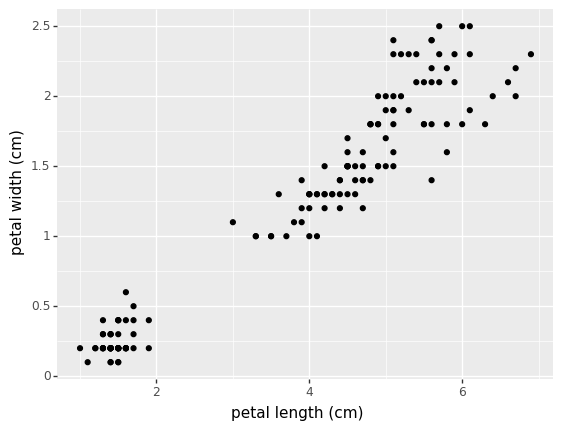

<ggplot: (8730894922737)>

In [7]:
# Diagrama de dispersión (Petal length v/s Petal width)
ggplot(tempDF) + aes(x="petal length (cm)", y="petal width (cm)") + geom_point()

## **2. Kmeans**

#### **2.1 Invocando KMeans()**

La mayoría de los modelos de ``sklearn`` corresponden a *objetos* de cierta *clase* con propiedades y funciones específicas. En términos prácticos solo se necesita crear una caja mágica que contiene todo lo necesario para aplicar y analizar los modelos.

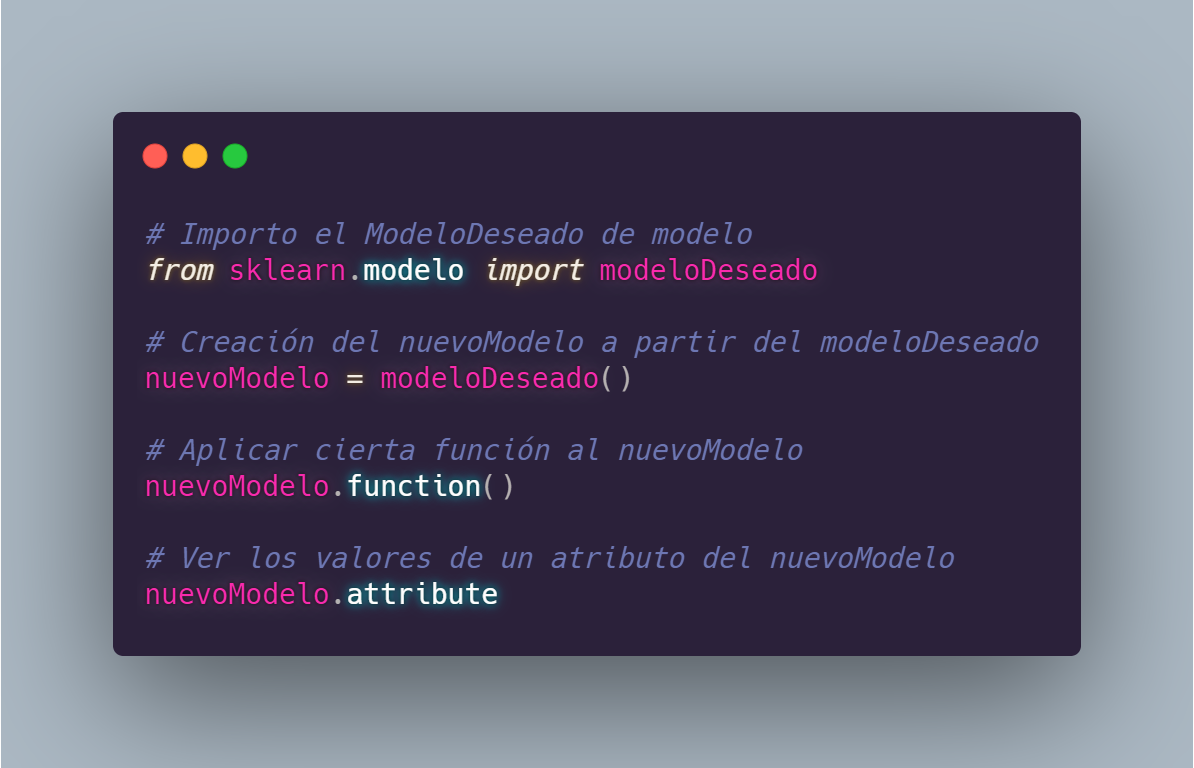

In [8]:
from IPython.display import Image
Image("figs/import_sklearn.png")

En el caso de `Kmeans`, existen múltiples parámetros para este modelo.

``KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, random_state=None)``

Donde:

* *n_clusters*: número de clusters.
* *init*: `k-means++` inicialización inteligente, `random` aleatoria. 
* *n_init*: Número de veces que aplicaremos k-means.
* *max_iter*: Máximo número de iteraciones para cada ejecución.
* *tol*: Tolerancia para la convergencia.
* *random_state*: Semilla para inicializar los centroides. Use un entero para ser determinista.

Por otro lado, existen múltiple métodos/funciones para el modelo k-means

* *km.fit(data)*: entrenar el modelo usando ciertos datos, retorna el modelo entrenado
* *km.predict(data)*: Dado un modelo entrenado, determina a que clase pertenece cada punto, retorna un vector con predicciones

In [9]:
# Invocando de Cluster, la función Kmeans
from sklearn.cluster import KMeans

# Creo objeto KMeans con las condiciones iniciales
km = KMeans()

# Muestro el objeto KMeans
km 

KMeans()

In [10]:
# Entrenando el modelo con los datos de iris 
km = km.fit(tempDF)
km 

KMeans()

Una vez entrenado el modelo, existen nuevas características o atributos que podemos observar , por ejemplo.

* ``cluster_centers``: Las coordenadas de los centroides. Si el algoritmo no converge estos no serán consistentes con los labels.
* ``inertia_float``: la suma total de los *within cluster distance*.
* ``labels``: Las etiquetas de cada punto (cluster al que pertenece)
* ``n_iter_``: número de iteraciones del algoritmo

In [11]:
# Muestra los centros de los  clusters construidos
km.cluster_centers_

array([[6.61666667, 3.07916667, 5.5625    , 2.1375    ],
       [4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [5.62083333, 2.69166667, 4.075     , 1.2625    ],
       [6.44210526, 2.97894737, 4.59473684, 1.43157895],
       [7.54      , 3.15      , 6.39      , 2.09      ],
       [6.03684211, 2.70526316, 5.        , 1.77894737],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [5.        , 2.3       , 3.275     , 1.025     ]])

In [12]:
# Within Cluster Distance
km.inertia_

30.185072738664843

In [13]:
# Etiquetas 
km.labels_

array([6, 1, 1, 1, 6, 6, 1, 6, 1, 1, 6, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       1, 6, 1, 1, 6, 6, 6, 1, 1, 6, 6, 6, 1, 1, 6, 6, 1, 6, 6, 1, 1, 6,
       6, 1, 6, 1, 6, 1, 3, 3, 3, 2, 3, 2, 3, 7, 3, 2, 7, 2, 2, 3, 2, 3,
       2, 2, 5, 2, 5, 2, 5, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 5, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 7, 2, 2, 2, 3, 7, 2, 0, 5, 0, 0, 0, 4, 2, 4, 0, 4,
       0, 5, 0, 5, 5, 0, 0, 4, 4, 5, 0, 5, 4, 5, 0, 4, 5, 5, 0, 0, 4, 4,
       0, 5, 5, 4, 0, 0, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 0, 5], dtype=int32)

In [14]:
# Iteraciones del algoritmo
km.n_iter_

6

### **2.2 Visualización de Cluster**

In [15]:
# Creando DataFrames con iris Data y las Etiquetas del Cluster obtenido
tempDF = pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['labels'] = km.labels_
tempDF.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,6
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,6


In [16]:
# Creando data frame con los centros y etiquetas
tempDF2 = pd.DataFrame(km.cluster_centers_,columns=iris.feature_names)
tempDF2['labels'] = range(km.n_clusters)
tempDF2.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,6.616667,3.079167,5.562500,2.1375,0
1,4.704545,3.122727,1.413636,0.2000,1
2,5.620833,2.691667,4.075000,1.2625,2


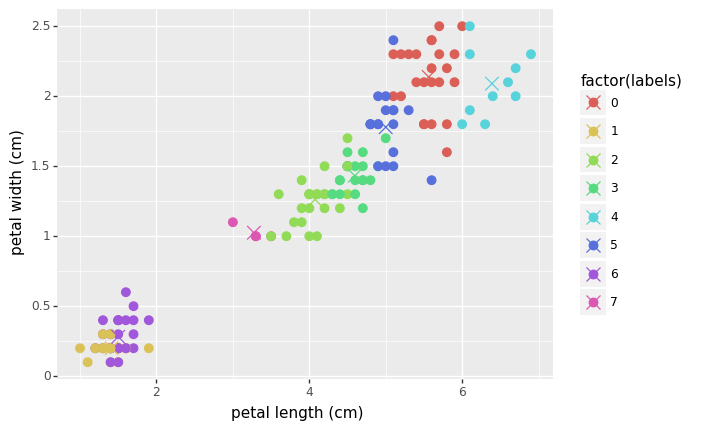

<ggplot: (8730946937335)>

In [17]:
# Plot de los datos y centro de los clusters
ggplot(tempDF) + aes(x="petal length (cm)", y="petal width (cm)",color="factor(labels)") + geom_point(size=3) + geom_point(data=tempDF2,shape="x",size=5)

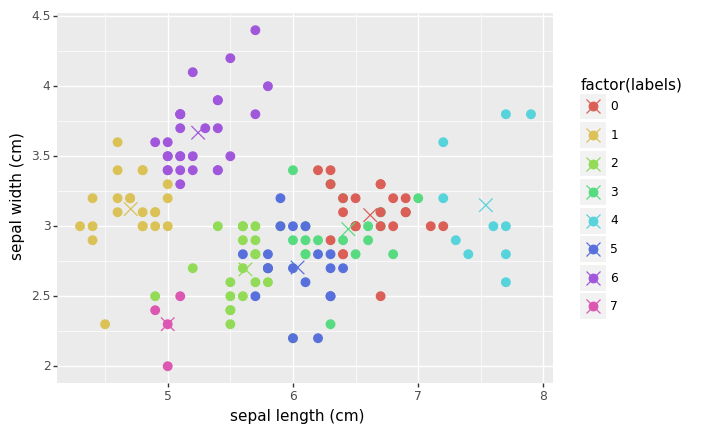

<ggplot: (8730945824416)>

In [18]:
ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)") + geom_point(size=3) + geom_point(data=tempDF2,shape="x", size=5)

### **2.3 Determinación de $k$**

En el análisis de clustering , el método del codo (elbow) es una heurística que se utiliza para determinar el número de clusters en un conjunto de datos . El método consiste en graficar la variación explicada en función del número de clusters y elegir el codo de la curva como el número de conglomerados a utilizar. El mismo método se puede utilizar para elegir el número de parámetros en otros modelos basados ​​en datos, como el número de componentes principales para describir un conjunto de datos.

Si el gráfico de líneas se parece a un brazo, entonces el "codo" (el punto de inflexión en la curva) es una buena indicación de que el modelo subyacente se ajusta mejor en ese punto.

In [19]:
# Heuristica del Elbow

# Variable para guardar el within cluster distance
sse = [] 

# número de cluster a probar (entre 2 y 11 conglomerados)
for k in range(1, 15): 
    # Creando el modelo, entrenandolo y obteniendo el valor del within cluster distance
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(iris.data)
    sse.append(kmeans.inertia_)

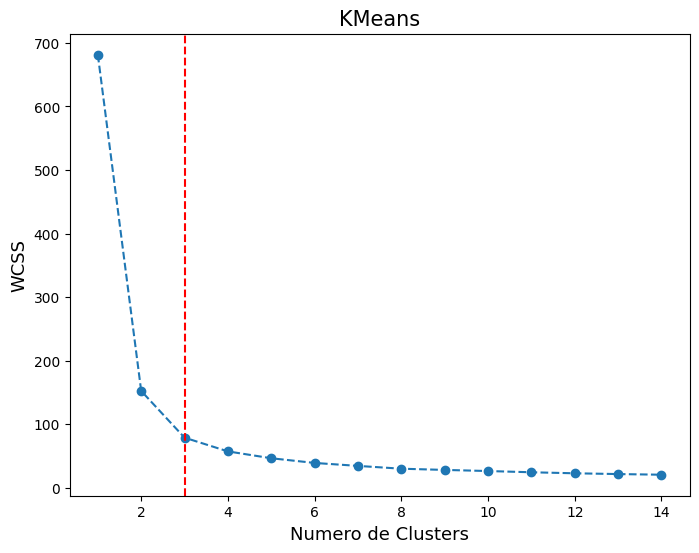

In [20]:
plt.figure(figsize=(8,6))
plt.plot(range(1,15), sse, marker='o',linestyle='--')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('KMeans',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

Utilizando Yellowbrick https://www.scikit-yb.org/en/latest/, se puede ver que el punto de inflexión para el conjunto de datos entrenados, es en $k=3$

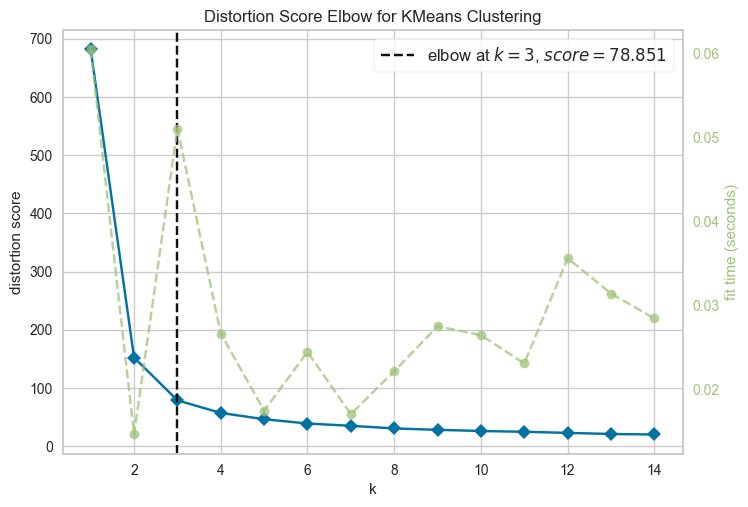

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15))
visualizer.fit(iris.data)    # Entrena los datos para la visualizacion
visualizer.poof()            # Visualizacion

In [22]:
# Entreno el modelo con K=3 y genero nueva visualizacion.
kmeans   = KMeans(n_clusters = 3,init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(iris.data)

# Genero etiquetas para la nueva visualizacion
tempDF = pd.DataFrame(iris.data, columns = iris.feature_names)
tempDF['labels'] = kmeans.labels_
tempDF.head(5)

# Creando data frame con los centros y etiquetas para la nueva visualizacion
tempDF2 = pd.DataFrame(kmeans.cluster_centers_,columns=iris.feature_names)
tempDF2['labels'] = range(kmeans.n_clusters)
tempDF2.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.901613,2.748387,4.393548,1.433871,0
1,5.006000,3.428000,1.462000,0.246000,1
2,6.850000,3.073684,5.742105,2.071053,2


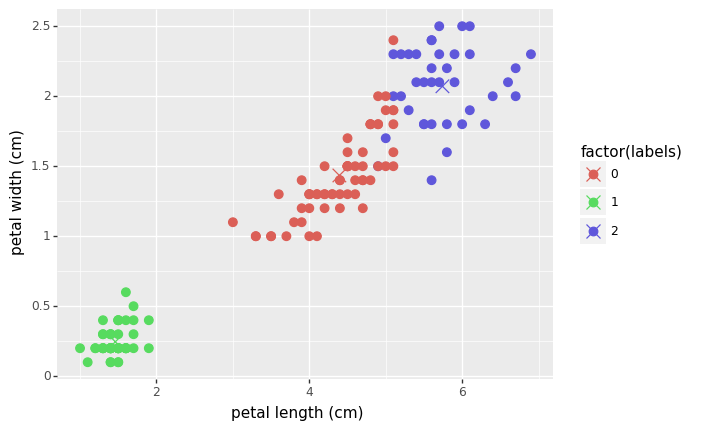

<ggplot: (8730945562917)>

In [23]:
# Plot de los datos y centro de los clusters
ggplot(tempDF) + aes(x="petal length (cm)", y="petal width (cm)",color="factor(labels)") + geom_point(size=3) + geom_point(data=tempDF2,shape="x",size=5)

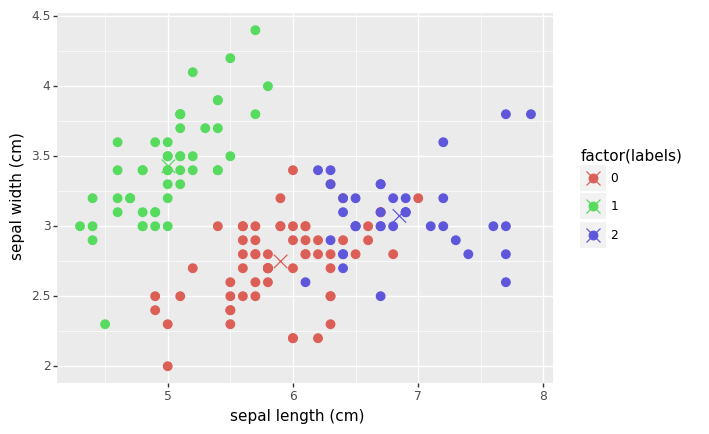

<ggplot: (8730894927111)>

In [24]:
ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point(size=3)+geom_point(data=tempDF2,shape="x",size=5)

### **2.4 Escalando Datos y encontrando $k$**

In [25]:
from sklearn.preprocessing import StandardScaler

# Creamos un objeto de la clase StandardScaler
scaler = StandardScaler() 

#Transformamos los datos (media 0, varianza 1)
scaled_features = scaler.fit_transform(iris.data) 

In [26]:
# Aplicando el mismo proceso anterior para buscar el número de K
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

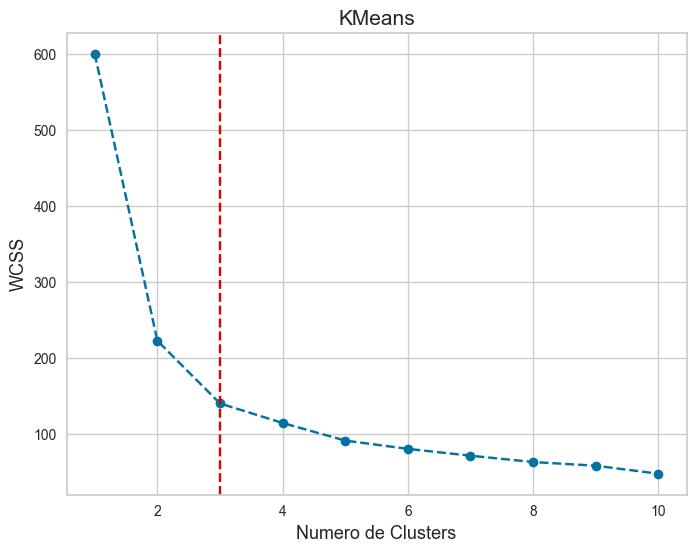

In [27]:
plt.figure(figsize=(8,6))
plt.plot(range(1,11), sse, marker='o',linestyle='--')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('KMeans',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

## **3. KModes**

Parámetros
* ``n_clusters``: número de clusters.
* ``max_iter``: máximo número de iteraciones.
* ``init``: Método de inicialización ('Huang', 'Cao', 'random') default: 'Cao'
* ``n_init``: número de veces que K-modes se ejecuta

Al igual que k-means tiene las funciones ``fit`` and ``predict``.

Atributos
* ``cluster_centroids_``: Centroide de los clusters.
* ``labels_``: Etiqueta de cada punto.
* ``cost_``: Suma de todos los puntos con respecto a los centroides.
* ``n_iter_``: número de iteraciones para el algoritmo.

In [28]:
! pip install kmodes

In [29]:
from kmodes.kmodes import KModes
from sklearn import preprocessing
import warnings

# Omite Warnings 
warnings.simplefilter("ignore")

In [30]:
bank = pd.read_csv('bank.csv',sep=";")
bank.head(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [31]:
# Extrayendo las variables categoricas
bank_cust = bank[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','poutcome']]
bank_cust.head(6)

,job,marital,education,default,housing,loan,contact,month,poutcome
0,unemployed,married,primary,no,no,no,cellular,oct,unknown
1,services,married,secondary,no,yes,yes,cellular,may,failure
2,management,single,tertiary,no,yes,no,cellular,apr,failure
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown
5,management,single,tertiary,no,no,no,cellular,feb,failure


In [32]:
#Agregando edad como variable categorica
bank_cust['edad'] = pd.cut(bank['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                           labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])

In [33]:
bank_cust.head(5)

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,20-30
1,services,married,secondary,no,yes,yes,cellular,may,failure,30-40
2,management,single,tertiary,no,yes,no,cellular,apr,failure,30-40
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,20-30
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,50-60


In [34]:
# Resusmen descriptivo de los datos
bank_cust.describe() 

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
count,4521,4521,4521,4521,4521,4521,4521,4521,4521,4521
unique,12,3,4,2,2,2,3,12,4,8
top,management,married,secondary,no,yes,no,cellular,may,unknown,30-40
freq,969,2797,2306,4445,2559,3830,2896,1398,3705,1800


In [35]:
# Verificando si existe algún valor nulo
bank_cust.isnull().sum() 

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
edad         0
dtype: int64

In [36]:
# Copia de los datos de origen
bank_cust_orig = bank_cust.copy() 

# Transformando los datos a números (sklearn no trabaja con datos categóricos)
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,edad
0,10,1,0,0,0,0,0,10,3,1
1,7,1,1,0,1,1,0,8,0,2
2,4,2,2,0,1,0,0,0,0,2
3,4,1,2,0,1,1,2,6,3,1
4,1,1,1,0,1,0,2,8,3,4


In [37]:
# Creando el modelo y ajustándolo
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
km_cao = km_cao.fit(bank_cust)
print("Cluster 0:",sum(km_cao.labels_==0))
print("Cluster 1:",sum(km_cao.labels_==1))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 453, cost: 16233.0
Run 1, iteration: 2/100, moves: 469, cost: 16075.0
Run 1, iteration: 3/100, moves: 106, cost: 16075.0
Cluster 0: 3267
Cluster 1: 1254


In [38]:
# Veamos los centroides (no es eficiente)
print(bank_cust.columns)
for i in range(km_cao.n_clusters):
    for j in range(len(km_cao.cluster_centroids_[i,])):
        le.fit(bank_cust_orig.iloc[:,j])
        print(list(le.inverse_transform([km_cao.cluster_centroids_[i,j]]))," ",end="")
    print("")

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'edad'],
      dtype='object')
['blue-collar']  ['married']  ['secondary']  ['no']  ['yes']  ['no']  ['cellular']  ['may']  ['unknown']  ['30-40']  
['management']  ['single']  ['tertiary']  ['no']  ['no']  ['no']  ['cellular']  ['aug']  ['unknown']  ['50-60']  


## **4. Ejemplos Kmeans**

In [39]:
from sklearn import datasets

# Cargando el dataset de vino
wine = datasets.load_wine() 

# Analizando las variables que tiene
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [40]:
# Analizando las variables que tiene
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [41]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [42]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler

# Creamos un objeto de la clase StandardScaler
scaler = StandardScaler() 

# Transformamos los datos
scaled_features = scaler.fit_transform(wine.data) 
sse=[]

# Buscando el número de clusters
from sklearn.cluster import KMeans
maxCluster=20
for k in range(1, maxCluster):
    kmeans = KMeans(n_clusters=k,n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

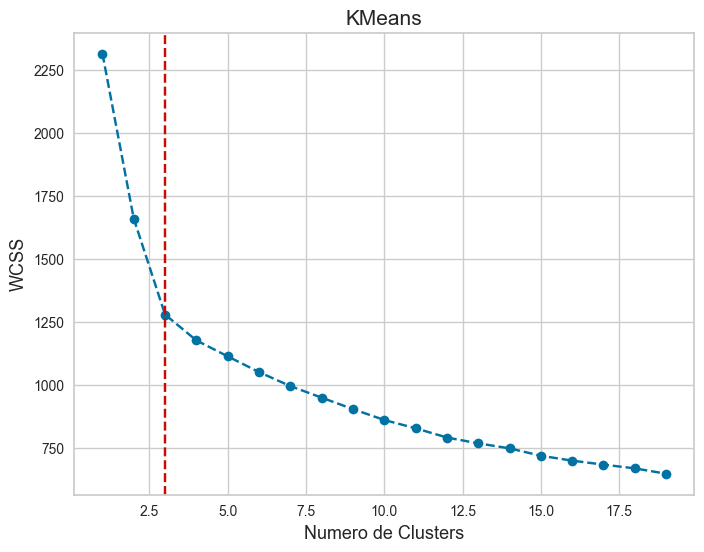

In [43]:
plt.figure(figsize=(8,6))
plt.plot(range(1,maxCluster), sse, marker='o',linestyle='--')
plt.axvline(x=3, color='r', linestyle='--')
plt.title('KMeans',fontsize=15)
plt.xlabel('Numero de Clusters',fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.show()

In [44]:
# Aplicando el número de clusters seleccionado
selectedCluster = 3
kmeans = KMeans(n_clusters=selectedCluster,n_init=10)
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

## **4. Árbol de Clasificación**

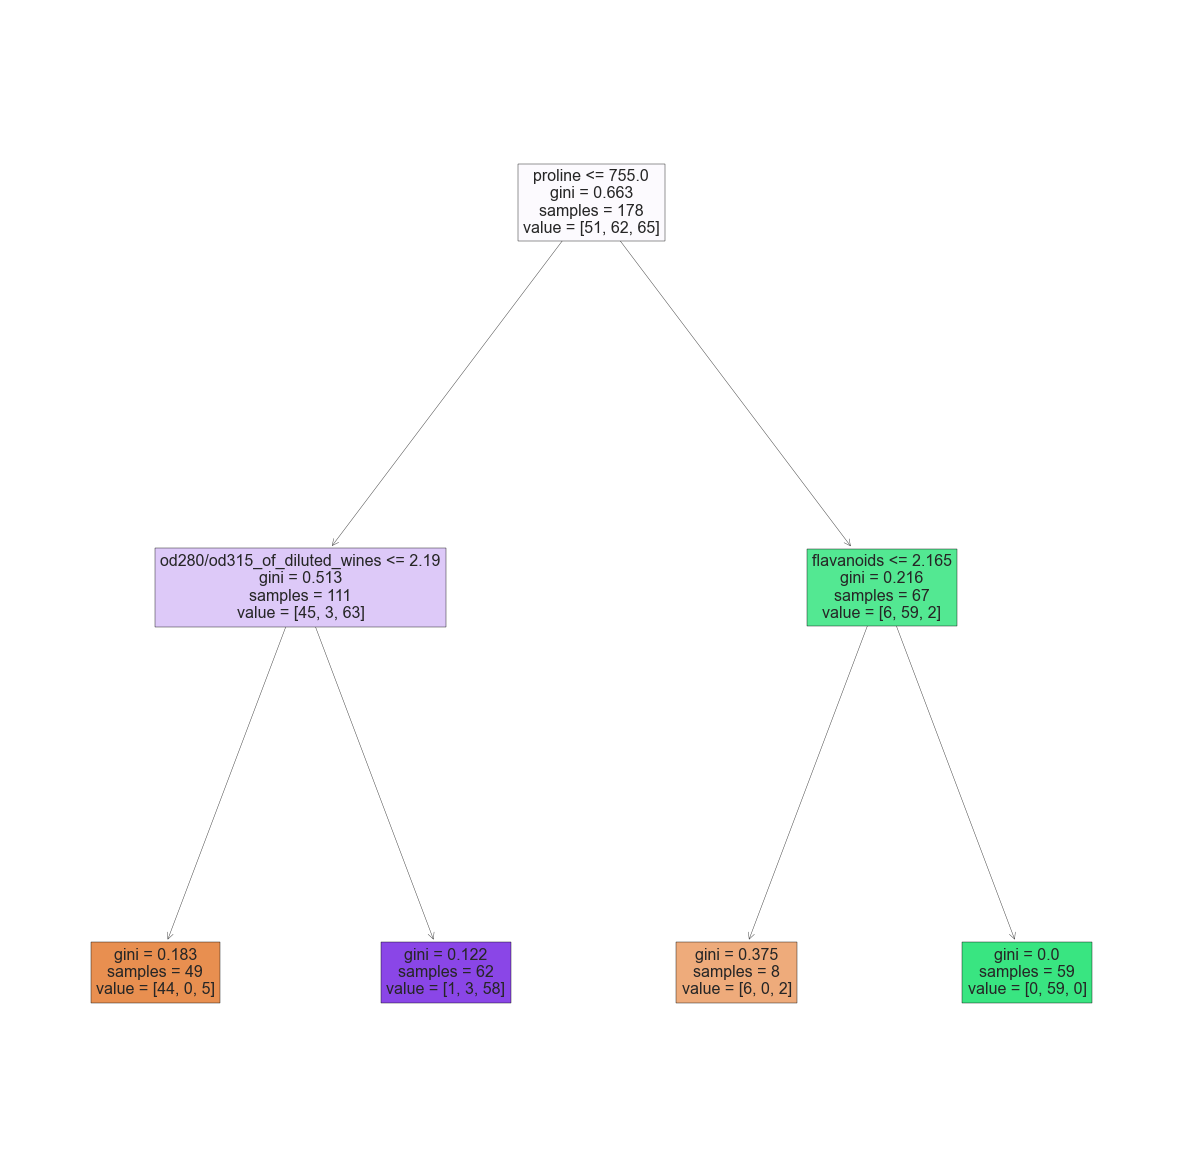

In [45]:
# Posteriormente veremos y entenderemos más sobre el árbol de decisión
import matplotlib.pyplot as plt

# Creando un objeto de la clase tree
from sklearn import tree

tempDF = pd.DataFrame(wine.data,columns = wine.feature_names)
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(tempDF, kmeans.labels_.astype("str"))

plt.figure(figsize=(15,15))
tree.plot_tree(clf,feature_names = wine.feature_names,filled=True) 
plt.show()

## **5. Componentes Principales**

In [46]:
# Creando el objeto y aplicando PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_features)

tempData = pca.transform(scaled_features)
tempData = pd.DataFrame(tempData,columns=["PC1","PC2"])
tempData["labels"]=kmeans.labels_

tempData

,PC1,PC2,labels
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1
...,...,...,...
173,-3.370524,-2.216289,0
174,-2.601956,-1.757229,0
175,-2.677839,-2.760899,0
176,-2.387017,-2.297347,0


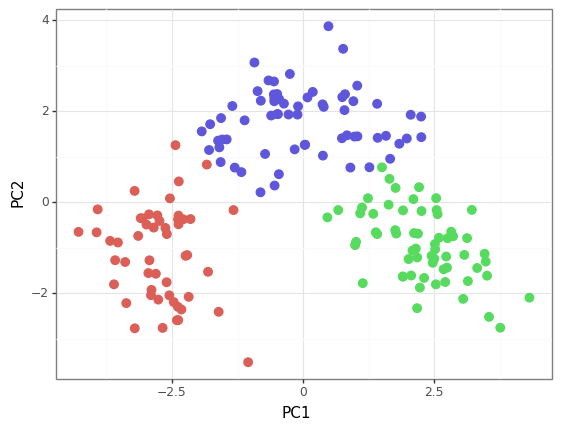

<ggplot: (8730942707249)>

In [47]:
ggplot(tempData)+aes(x="PC1",y="PC2",color="factor(labels)")+geom_point(show_legend=False, size=3)+theme_bw()

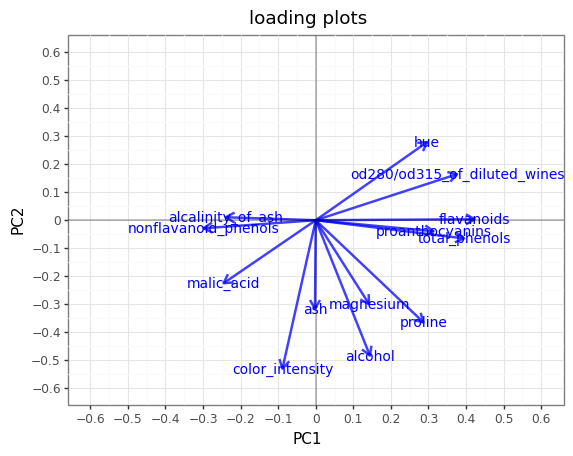

<ggplot: (8730945451448)>

In [48]:
# Analizando los componentes
datapc = pd.DataFrame(pca.components_.transpose(),columns=["PC1","PC2"])
datapc['varNames']=wine.feature_names
datapc
(ggplot(datapc)+
  theme_bw()+
  labs(title="loading plots")+
  geom_text(aes(x="PC1", y="PC2", label="varNames"), size = 10, color="blue")+
  geom_segment(aes(x=0, y=0, xend="PC1", yend="PC2"), arrow=arrow(length=0.1),size=1, alpha=0.75, color="blue")+
  scale_x_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  scale_y_continuous(limits=[-0.9,0.9],breaks=[-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6])+
  geom_hline(yintercept = 0, size=.2)+
  geom_vline(xintercept = 0, size=.2)+
  coord_cartesian([-0.6,0.6],[-0.6,0.6])
)

## **6. Análisis de Centroides**

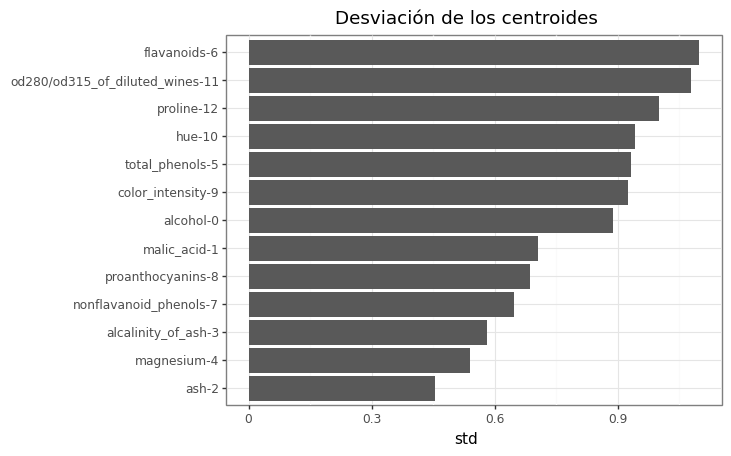

<ggplot: (8730941288379)>

In [49]:
KMcentroids = pd.DataFrame(kmeans.cluster_centers_,columns=wine.feature_names)
tempDF = pd.DataFrame(KMcentroids.std(),columns=["std"])
tempDF["varNames"]=wine.feature_names
for i in range(len(tempDF["varNames"])):
    tempDF["varNames"][i] += "-"+str(i)
orderVar=tempDF.sort_values("std")["varNames"]

#Se puede usar un gráfico de cleveland también, pero no debería haber valores en escalas muy distintas
(ggplot(tempDF)
 +aes(y="std",x="varNames")
 +theme_bw()
 +geom_col()
 +scale_x_discrete(limits=orderVar)
 +coord_flip()
 +labs(title="Desviación de los centroides",x="")
)

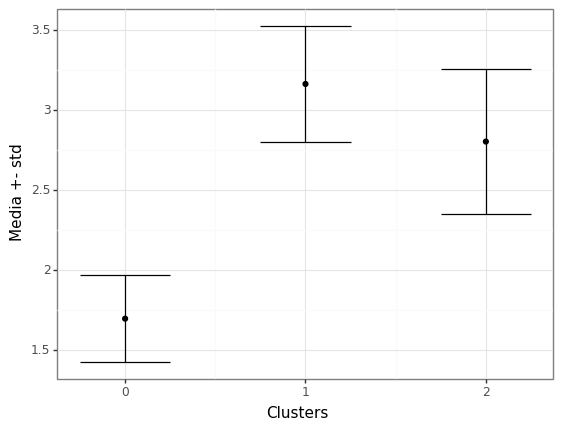

<ggplot: (8730945485153)>

In [50]:
# Analizando la variable que queremos ver
varToAnalyze=11
tempDF = pd.DataFrame(np.zeros(shape=(kmeans.n_clusters,2)),columns = ["mean","std"])
for i in range(kmeans.n_clusters):
    tempDF["mean"][i]=wine.data[kmeans.labels_==i,varToAnalyze].mean()
    tempDF["std"][i]=wine.data[kmeans.labels_==i,varToAnalyze].std()

# Creando el gráfico
(ggplot(tempDF)
 +aes(x=range(kmeans.n_clusters),y="mean",ymin="mean-std",ymax="mean+std")
 +theme_bw()
 +geom_errorbar()
 +geom_point()
 +scale_x_continuous(breaks=range(kmeans.n_clusters))
 +labs(x="Clusters",y="Media +- std")
)